In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [4]:
data = read.csv('data/wiki.csv.xz',
                stringsAsFactors=F)
data$Vandal = as.factor(data$Vandal)
table(data$Vandal)


   0    1 
2061 1815 

In [5]:
library(tm)

Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



In [12]:
corpusAdded = Corpus(VectorSource(data$Added))
#corpusAdded = tm_map(corpusAdded, PlainTextDocument)
corpusAdded = tm_map(corpusAdded, removeWords,
                     stopwords('english'))
corpusAdded = tm_map(corpusAdded, stemDocument)
dtmAdded = DocumentTermMatrix(corpusAdded)
dtmAdded

<<DocumentTermMatrix (documents: 3876, terms: 6675)>>
Non-/sparse entries: 15368/25856932
Sparsity           : 100%
Maximal term length: 784
Weighting          : term frequency (tf)

In [24]:
sparseAdded = removeSparseTerms(dtmAdded, 0.997)
sparseAdded

<<DocumentTermMatrix (documents: 3876, terms: 166)>>
Non-/sparse entries: 2681/640735
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency (tf)

In [25]:
wordsAdded = as.data.frame(as.matrix(sparseAdded))
colnames(wordsAdded) = paste('A', colnames(wordsAdded))

In [33]:
corpusRemoved = Corpus(VectorSource(data$Removed))
#corpusRemoved = tm_map(corpusRemoved, PlainTextDocument)
corpusRemoved = tm_map(corpusRemoved, removeWords,
                       stopwords('english'))
corpusRemoved = tm_map(corpusRemoved, stemDocument)
dtmRemoved = DocumentTermMatrix(corpusRemoved)
dtmRemoved
sparseRemoved = removeSparseTerms(dtmRemoved, 0.997)
sparseRemoved
wordsRemoved = as.data.frame(as.matrix(sparseRemoved))
colnames(wordsRemoved) = paste('R', colnames(wordsRemoved))

<<DocumentTermMatrix (documents: 3876, terms: 5403)>>
Non-/sparse entries: 13293/20928735
Sparsity           : 100%
Maximal term length: 784
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 3876, terms: 162)>>
Non-/sparse entries: 2552/625360
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency (tf)

In [35]:
ncol(wordsRemoved)

[1] 162

In [36]:
wikiWords = cbind(wordsAdded, wordsRemoved)
wikiWords$Vandal = data$Vandal
library(caTools)
set.seed(123)
spl = sample.split(wikiWords$Vandal, 0.7)
train = subset(wikiWords, spl==T)
test = subset(wikiWords, spl==F)
t = table(test$Vandal)
t


  0   1 
618 545 

[1] 1

In [38]:
618/(545+618)

[1] 0.5313844

In [41]:
library(rpart)
library(rpart.plot)
wikiCART = rpart(Vandal ~ ., data=train,
                 method='class')
pred = predict(wikiCART, newdata=test, type='class')

In [44]:
t = table(test$Vandal, pred)
t
sum(diag(t))/sum(t)

   pred
      0   1
  0 618   0
  1 533  12

[1] 0.5417025

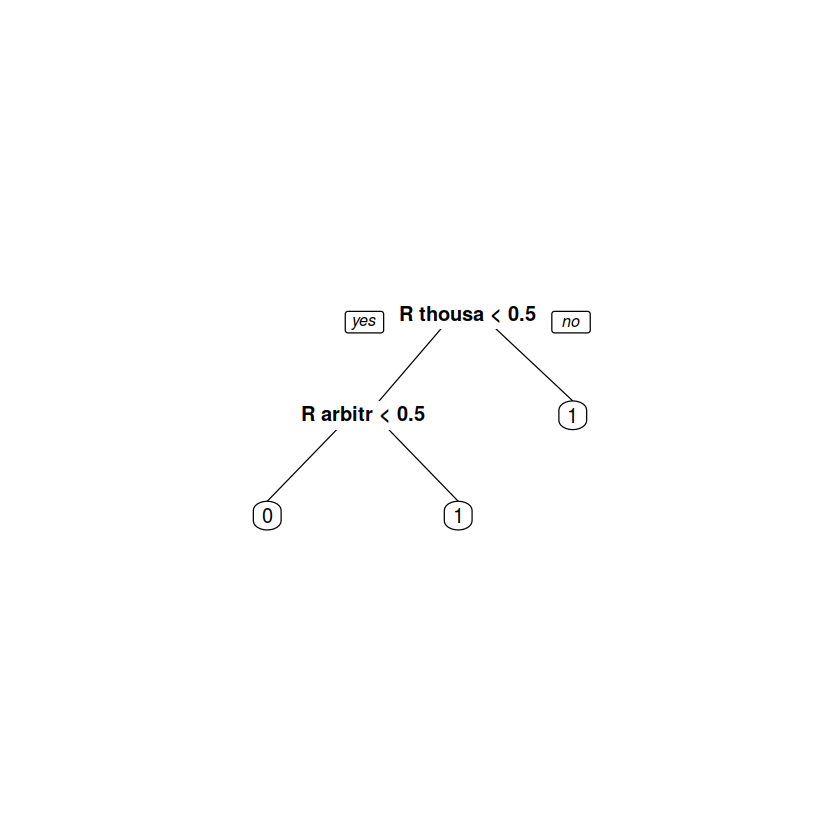

In [46]:
prp(wikiCART)

In [47]:
wikiWords2 = wikiWords
wikiWords2$HTTP = ifelse(
    grepl('http', data$Added, fixed=T),
    1, 0)
table(wikiWords2$HTTP)


   0    1 
3659  217 

In [50]:
train2 = subset(wikiWords2, spl==T)
test2 = subset(wikiWords2, spl==F)
wikiCART2 = rpart(Vandal ~ ., data=train2,
                  method='class')
pred = predict(wikiCART2, newdata=test2, type='class')
t = table(test2$Vandal, pred)
t
sum(diag(t))/sum(t)

   pred
      0   1
  0 609   9
  1 488  57

[1] 0.5726569

In [51]:
wikiWords2$NumWordsAdded = rowSums(
    as.matrix(dtmAdded))
wikiWords2$NumWordsRemoved = rowSums(
    as.matrix(dtmRemoved))

 num [1:3876] 96 3 0 10 94 4 3 2 5 0 ...


In [52]:
mean(wikiWords2$NumWordsAdded)

[1] 4.050052

In [53]:
train3 = subset(wikiWords2, spl==T)
test3 = subset(wikiWords2, spl==F)
wikiCART3 = rpart(Vandal ~ ., data=train3,
                  method='class')
pred = predict(wikiCART3, newdata=test3, type='class')
t = table(test3$Vandal, pred)
t
sum(diag(t))/sum(t)

   pred
      0   1
  0 514 104
  1 297 248

[1] 0.6552021

In [62]:
wikiWords3 = wikiWords2
wikiWords3$Minor = data$Minor
wikiWords3$Loggedin = data$Loggedin

train4 = subset(wikiWords3, spl==T)
test4 = subset(wikiWords3, spl==F)
wikiCART4 = rpart(Vandal ~ ., data=train4,
                  method='class')
pred = predict(wikiCART4, newdata=test4,
               type='class')
t = table(test4$Vandal, pred)
t
sum(diag(t))/sum(t)

   pred
      0   1
  0 595  23
  1 304 241

[1] 0.7188306

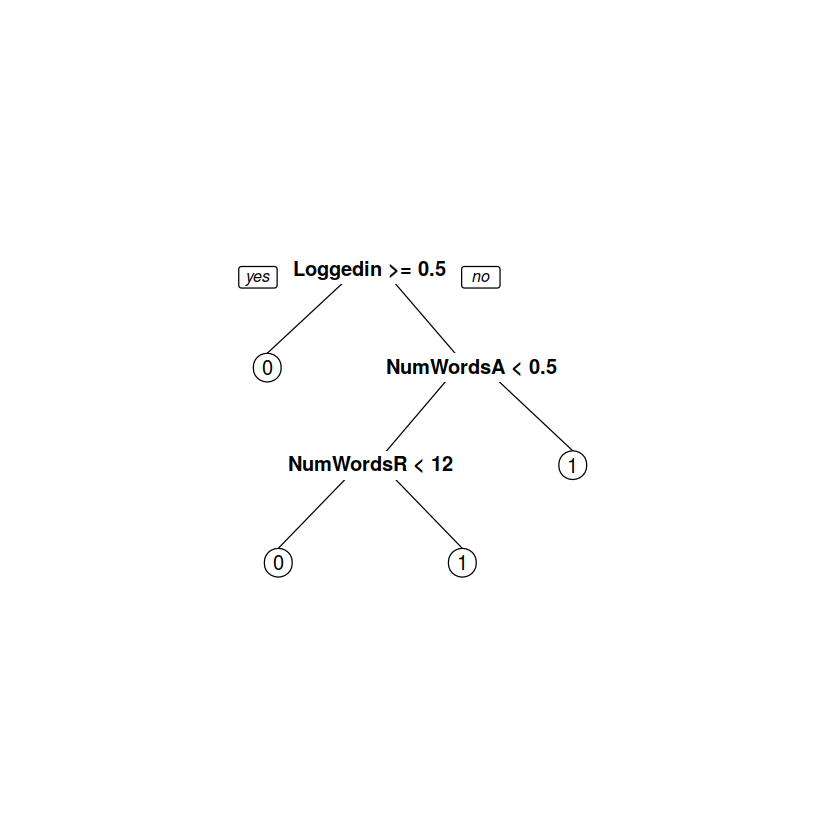

In [63]:
prp(wikiCART4)
#colnames(head(data))